Задание: 
обучить на MNIST (датасет рукописных цифр) полносвязную нейронную сеть, а также сверточную (две разных нейросети). Для этого разрешается пользоваться библиотеками tensorflow/keras/pytorch и numpy. Необходимо также использовать валидационную выборку для отслеживания эффективности работы обеих сеток и вывести графики, отображающие динамику обучения архитектур (на каждом графике кривые обучающей и валидационной выборок).

# **Обработка данных**

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

valid_size = 10000
X_valid = X_train[:valid_size]
y_valid = y_train[:valid_size]
X_train = X_train[valid_size:]
y_train = y_train[valid_size:]


# **Полносвзяная нейронная сеть**

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
batch_size = 128
epochs = 9

checkpoint = ModelCheckpoint('best_model_p.h5', save_best_only=True)

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint])


Epoch 1/9
391/391 [==============================] - 8s 20ms/step - loss: 0.2881 - accuracy: 0.9183 - val_loss: 0.1607 - val_accuracy: 0.9528
Epoch 2/9
391/391 [==============================] - 8s 20ms/step - loss: 0.1216 - accuracy: 0.9641 - val_loss: 0.1165 - val_accuracy: 0.9658
Epoch 3/9
391/391 [==============================] - 8s 20ms/step - loss: 0.0788 - accuracy: 0.9764 - val_loss: 0.0877 - val_accuracy: 0.9740
Epoch 4/9
391/391 [==============================] - 4s 9ms/step - loss: 0.0552 - accuracy: 0.9842 - val_loss: 0.0801 - val_accuracy: 0.9761
Epoch 5/9
391/391 [==============================] - 5s 12ms/step - loss: 0.0408 - accuracy: 0.9880 - val_loss: 0.0779 - val_accuracy: 0.9762
Epoch 6/9
391/391 [==============================] - 4s 9ms/step - loss: 0.0298 - accuracy: 0.9917 - val_loss: 0.0732 - val_accuracy: 0.9773
Epoch 7/9
391/391 [==============================] - 4s 9ms/step - loss: 0.0227 - accuracy: 0.9941 - val_loss: 0.0674 - val_accuracy: 0.9800
Epoch 8/9

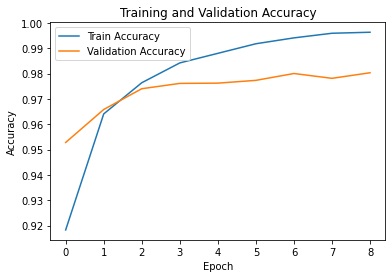

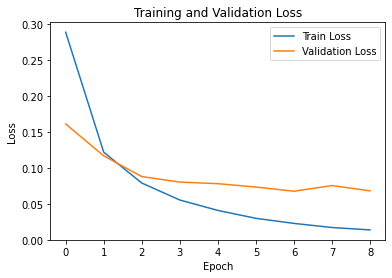

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Посмотрим на результаты тестовой выборки

In [ ]:
model = load_model('best_model.h5')

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.06826408952474594
Test accuracy: 0.9789999723434448


Судя по графикам, удалось избежать переобучния и данная полносвязная сеть способна решать поставленную задачу!

# **Сверточная нейронная сеть**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
checkpoint_s = ModelCheckpoint('best_model_s.h5', save_best_only=True)

In [ ]:
batch_size = 128
epochs = 9

checkpoint_s = ModelCheckpoint('best_model_s.h5', save_best_only=True)

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_s])


Epoch 1/9
391/391 [==============================] - 48s 121ms/step - loss: 0.4424 - accuracy: 0.8593 - val_loss: 0.1421 - val_accuracy: 0.9566
Epoch 2/9
391/391 [==============================] - 45s 114ms/step - loss: 0.1308 - accuracy: 0.9619 - val_loss: 0.0895 - val_accuracy: 0.9734
Epoch 3/9
391/391 [==============================] - 46s 117ms/step - loss: 0.0932 - accuracy: 0.9732 - val_loss: 0.0759 - val_accuracy: 0.9785
Epoch 4/9
391/391 [==============================] - 48s 123ms/step - loss: 0.0743 - accuracy: 0.9785 - val_loss: 0.0733 - val_accuracy: 0.9782
Epoch 5/9
391/391 [==============================] - 46s 119ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0596 - val_accuracy: 0.9839
Epoch 6/9
391/391 [==============================] - 46s 118ms/step - loss: 0.0529 - accuracy: 0.9840 - val_loss: 0.0631 - val_accuracy: 0.9840
Epoch 7/9
391/391 [==============================] - 46s 118ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0659 - val_accuracy:

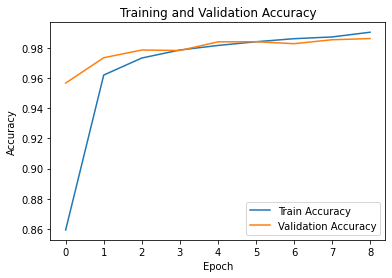

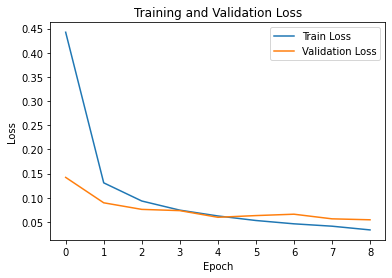

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Посмотрим на результаты тестовой выборки

In [ ]:
model = load_model('best_model_s.h5')

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.04137858748435974
Test accuracy: 0.9886000156402588


Данная сверточная сеть также справляется со своей задачей, но тут все таки появляется не большой признак переобучения, но все таки это не оно.